# Analisi del marketplace di Google per l'implementazione di una nuova app.

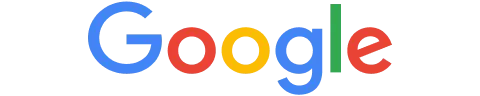

In [6]:
import pandas as pd
nome_file = 'C:\\Users\\vdibi\\Desktop\\MASTER IN DATA ANALYSIS\\6. DATA MANIPULATION\\googleplaystore.csv'  
dati = pd.read_csv(nome_file)

## 1. Distribuzione delle categorie tra le app a pagamento e gratuite. 

### Le prime 10 categorie di app a pagamento

In [22]:
paid_apps = dati[dati['Type'] == 'Paid']
paid_app_counts = paid_apps.groupby(['Type', 'Category'])['Type'].count()
paid_app_counts = paid_app_counts.sort_values(ascending=False)
paid_app_counts = paid_app_counts.head(10)
print(paid_app_counts)

Type  Category           
Paid  FAMILY                 191
      MEDICAL                109
      GAME                    83
      PERSONALIZATION         83
      TOOLS                   78
      BOOKS_AND_REFERENCE     28
      PRODUCTIVITY            28
      COMMUNICATION           27
      SPORTS                  24
      PHOTOGRAPHY             22
Name: Type, dtype: int64


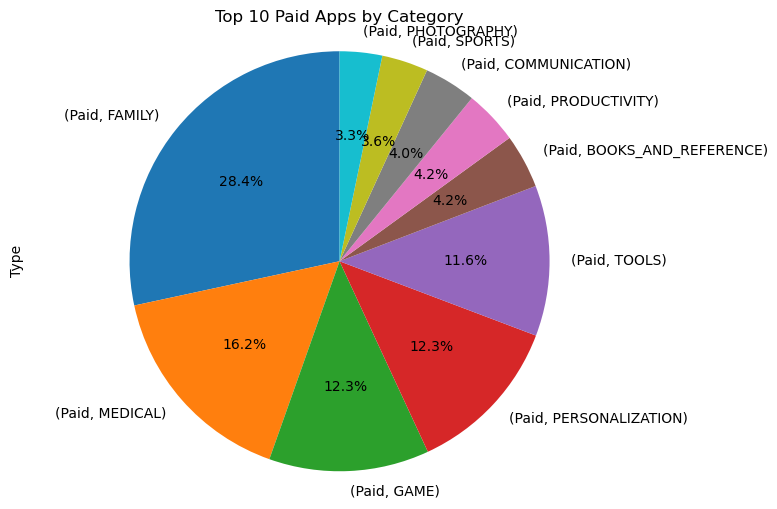

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
paid_app_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Paid Apps by Category')
plt.axis('equal') 
plt.show()

### Le prime 10 categorie di app gratuite

In [12]:
free_apps = dati[dati['Type'] == 'Free']
free_app_counts = free_apps.groupby(['Type', 'Category'])['Type'].count()
free_app_counts = free_app_counts.sort_values(ascending=False)
free_app_counts = free_app_counts.head(10)
print(free_app_counts)

Type  Category     
Free  FAMILY           1780
      GAME             1061
      TOOLS             765
      BUSINESS          446
      PRODUCTIVITY      396
      LIFESTYLE         363
      SPORTS            360
      COMMUNICATION     360
      MEDICAL           354
      FINANCE           349
Name: Type, dtype: int64


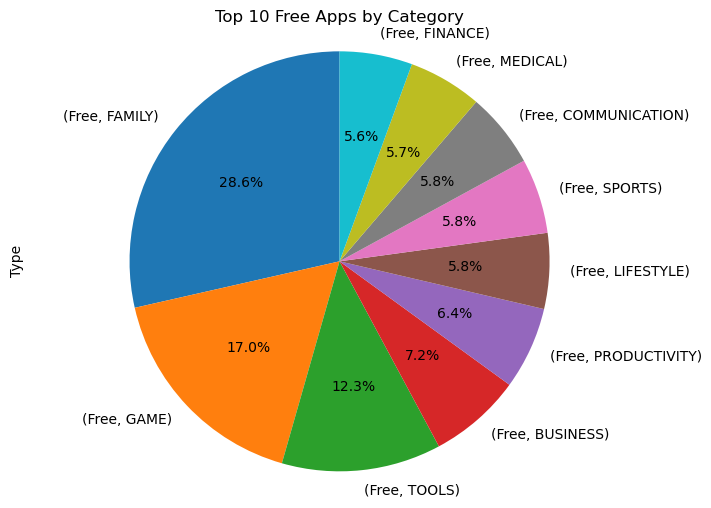

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
free_app_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Free Apps by Category')
plt.axis('equal')
plt.show()

- Il grafico a torta indica chiaramente che "FAMILY", "GAME" e "TOOLS" sono le categorie più popolari per le app GRATUITE. 
- In generale, ci sono meno app a PAGAMENTO ma sono distribuite in più categorie, il che suggerisce un mercato più diversificato per le app a pagamento.

In particolare:

- Le app FAMILY rappresentano quasi il 29% di tutte le app GRATUITE e il 23% di tutte le app A PAGAMENTO.
- Le app GAME rappresentano il 17% di tutte le app GRATUITE e il 10% di tutte le app A PAGAMENNTO.
- Le app MEDICAL rappresentano il 5% di tutte le app GRATUITE e il 13% di tutte le app A PAGAMENTO.

Questa analisi suggerisce che:

- Le app per famiglie sono tanto diffuse nel mercato delle app a pagamento quanto in quello delle app gratuite. Ciò potrebbe suggerire che i genitori sono disposti a pagare per app di alta qualità adatte alle famiglie.
- Le app mediche hanno un'alta percentuale nel mercato delle app a pagamento. Ciò indica che gli utenti sono disposti a pagare per app relative alla salute, potenzialmente per funzionalità specializzate o informazioni affidabili.
- I giochi rimangono una categoria significativa nel mercato delle app a pagamento così come in quello delle app gratuite.

## 2. Classificazioni dei contenuti per le app

Nel mercato delle app Android, la maggior parte delle app sono sviluppare per un target ampio. Solo per l'11.1%, le app sono sviluppate per i minorenni.

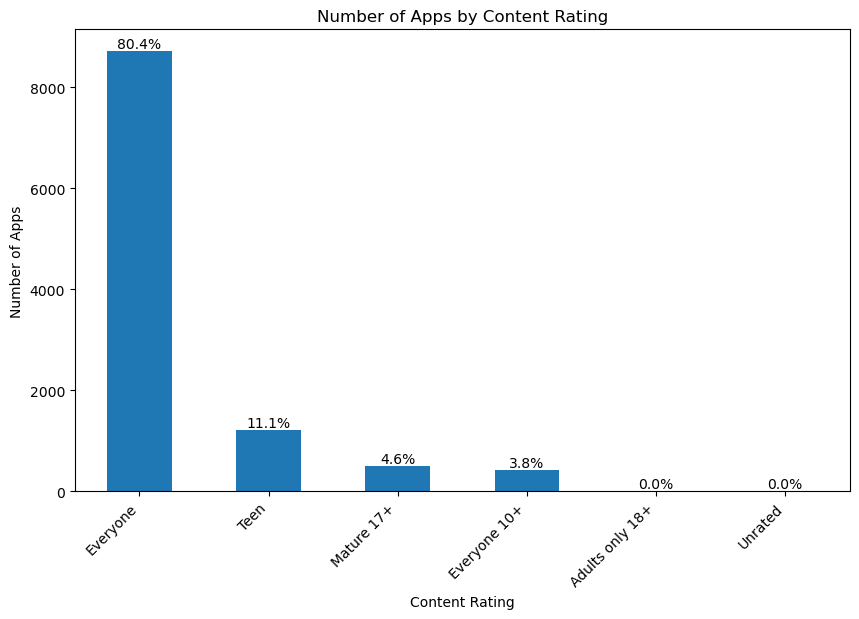

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
content_rating_counts = dati['Content Rating'].value_counts()
percentages = content_rating_counts / content_rating_counts.sum() * 100
plt.figure(figsize=(10, 6))  
ax = content_rating_counts.plot(kind='bar')
plt.title('Number of Apps by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45, ha='right') 
for i, v in enumerate(content_rating_counts):
    ax.text(i, v + 10, f'{percentages.iloc[i]:.1f}%', ha='center', va='bottom')
plt.show()

## 3. Distribuzione delle valutazioni delle app a pagamento e gratuite 

### Distribuzione delle valutazioni per le app a pagamento

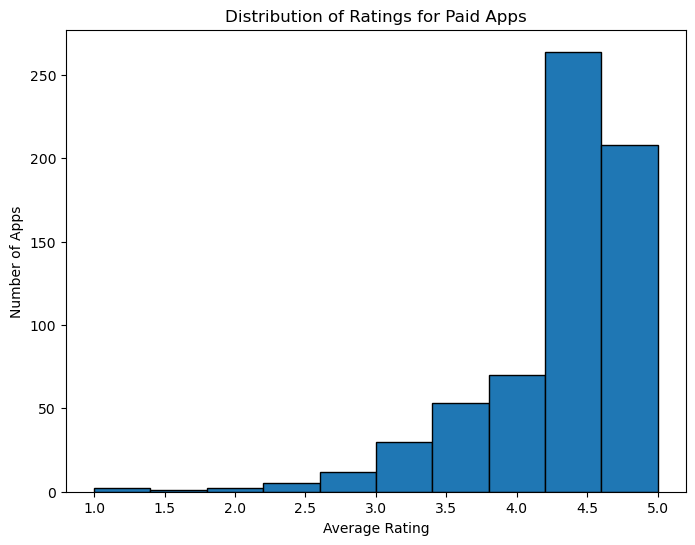

count    647.000000
mean       4.266615
std        0.547523
min        1.000000
25%        4.100000
50%        4.400000
75%        4.600000
max        5.000000
Name: Rating, dtype: float64


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
paid_apps = dati[dati['Type'] == 'Paid']
plt.figure(figsize=(8, 6))
plt.hist(paid_apps['Rating'], bins=10, edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Number of Apps')
plt.title('Distribution of Ratings for Paid Apps')
plt.show()
print(paid_apps['Rating'].describe())

### Distribuzione delle valutazioni per le app gratuite

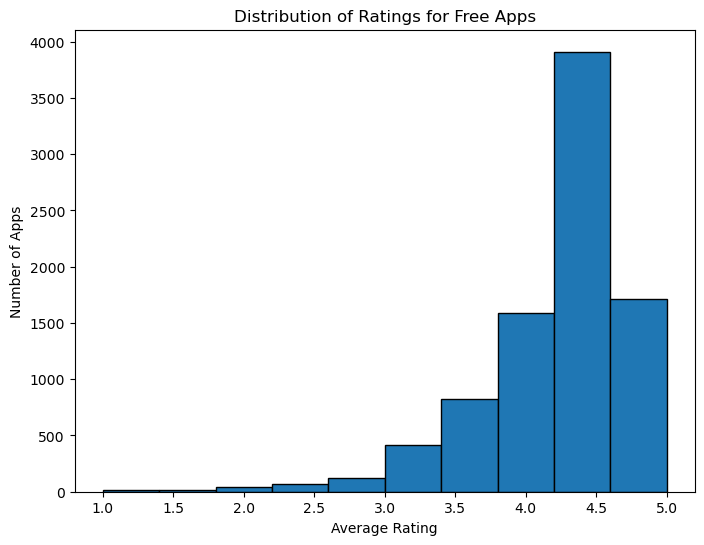

count    8719.000000
mean        4.186203
std         0.512338
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
free_apps = dati[dati['Type'] == 'Free']
plt.figure(figsize=(8, 6))
plt.hist(free_apps['Rating'], bins=10, edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Number of Apps')
plt.title('Distribution of Ratings for Free Apps')
plt.show()
print(free_apps['Rating'].describe())

## 4. Confronto tra le valutazioni medie per FAMILY, GAME e MEDICAL e le altre categorie

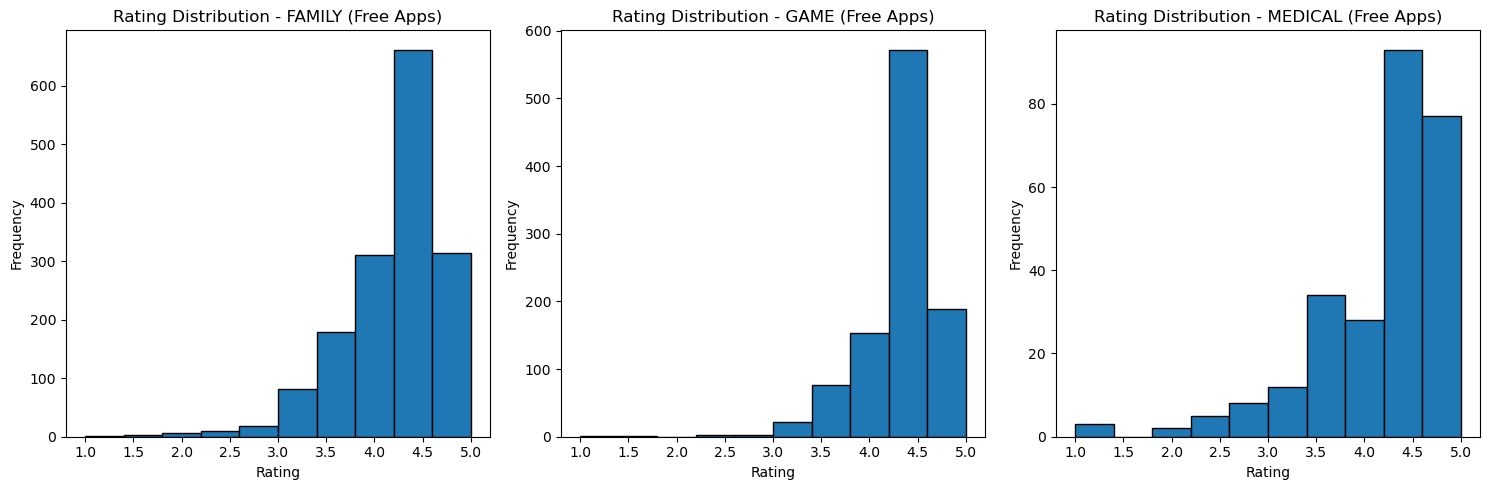

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
free_apps = dati[dati['Type'] == 'Free']
family_apps = free_apps[free_apps['Category'] == 'FAMILY']
game_apps = free_apps[free_apps['Category'] == 'GAME']
medical_apps = free_apps[free_apps['Category'] == 'MEDICAL']
plt.figure(figsize=(15, 5))  
plt.subplot(1, 3, 1)  
plt.hist(family_apps['Rating'], bins=10, edgecolor='black')
plt.title('Rating Distribution - FAMILY (Free Apps)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.subplot(1, 3, 2)  
plt.hist(game_apps['Rating'], bins=10, edgecolor='black')
plt.title('Rating Distribution - GAME (Free Apps)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.subplot(1, 3, 3)  
plt.hist(medical_apps['Rating'], bins=10, edgecolor='black')
plt.title('Rating Distribution - MEDICAL (Free Apps)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout() 
plt.show()

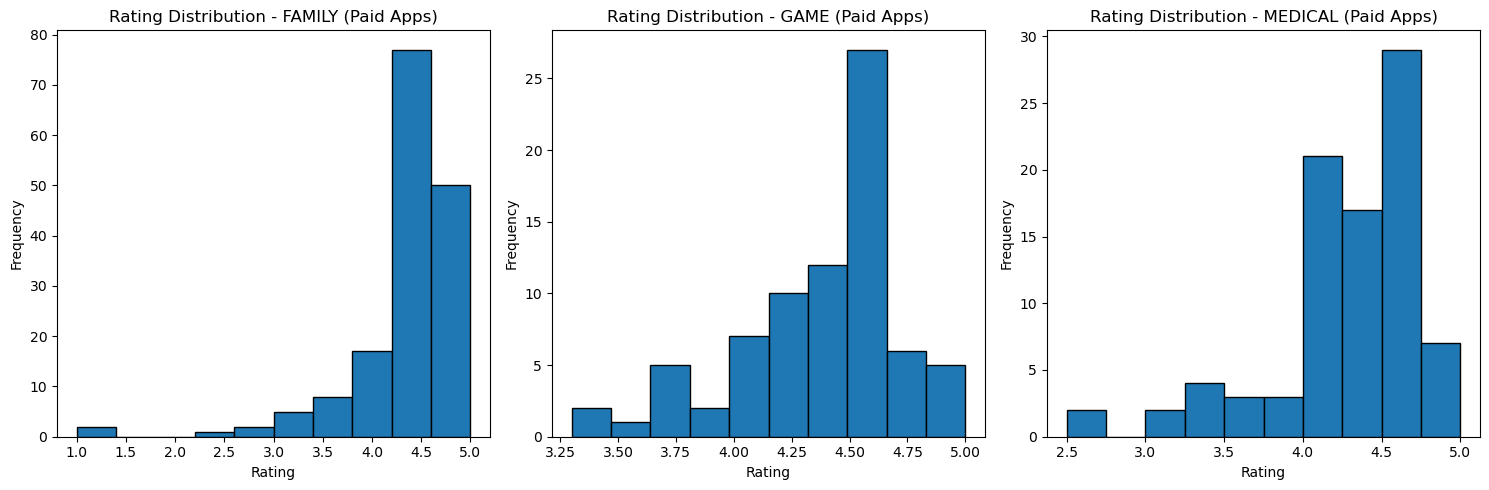

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
paid_apps = dati[dati['Type'] == 'Paid']
family_apps = paid_apps[paid_apps['Category'] == 'FAMILY']
game_apps = paid_apps[paid_apps['Category'] == 'GAME']
medical_apps = paid_apps[paid_apps['Category'] == 'MEDICAL']
plt.figure(figsize=(15, 5)) 
plt.subplot(1, 3, 1) 
plt.hist(family_apps['Rating'], bins=10, edgecolor='black')
plt.title('Rating Distribution - FAMILY (Paid Apps)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.subplot(1, 3, 2)  
plt.hist(game_apps['Rating'], bins=10, edgecolor='black')
plt.title('Rating Distribution - GAME (Paid Apps)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.subplot(1, 3, 3)  
plt.hist(medical_apps['Rating'], bins=10, edgecolor='black')
plt.title('Rating Distribution - MEDICAL (Paid Apps)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout() 
plt.show()

Le valutazioni delle app non sono distribuite in modo uniforme perchè risultano essere concentrate nella fascia 4.0-4.5.

In entrambe le categorie (pagamento e gratuite) si riscontrano valutazioni molto elevate. 

Di seguito alcune possibili spiegazioni per le valutazioni elevate in tutte le categorie di app.

* Bias dell'utente: gli utenti potrebbero essere più propensi a valutare positivamente le app se hanno già un'opinione positiva.
* Qualità delle app: aggiornamenti e correzioni di bug costanti contribuiscono a un'esperienza utente positiva e possono aumentare le valutazioni positive.
* Specificità della categoria: le app di gaming spesso ricevono valutazioni più elevate per il loro grado di intrattenimento ed engagement. 
* Social Media e Influencer : Promuovere le app sui social media e tramite influencer può aumentarne la visibilità e le valutazioni positive.

## 5. Esiste una correlazione fra numero di recensioni e valutazioni? 

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
family_apps = dati[(dati['Category'] == 'FAMILY') & (dati['Reviews'] != 0)]
correlation = family_apps['Rating'].corr(family_apps['Reviews'])
print(f'Coefficiente di correlazione per le app FAMILY: {correlation}')

Coefficiente di correlazione per le app FAMILY: 0.07605555577211562


In [85]:
import pandas as pd
import matplotlib.pyplot as plt
family_apps = dati[(dati['Category'] == 'GAME') & (dati['Reviews'] != 0)]
correlation = family_apps['Rating'].corr(family_apps['Reviews'])
print(f'Coefficiente di correlazione per le app GAME: {correlation}')

Coefficiente di correlazione per le app GAME: 0.1690250690656509


In [87]:
import pandas as pd
import matplotlib.pyplot as plt
family_apps = dati[(dati['Category'] == 'MEDICAL') & (dati['Reviews'] != 0)]
correlation = family_apps['Rating'].corr(family_apps['Reviews'])
print(f'Coefficiente di correlazione per le app MEDICAL: {correlation}')

Coefficiente di correlazione per le app MEDICAL: 0.176650380790508


Per rispondere al quesito, occore calcolare il coefficiente di correlazione che misura la forza della relazione tra due variabili.

Un valore vicino a 1 suggerisce una forte correlazione positi. 
In questo caso, tutte e tre le categorie FAMILY, GAME, MEDICAL mostrano un coefficiente vicino allo zero. 

È possibile che non ci sia una correlazione forte tra recensioni e valutazioni. Il numero di recensioni e le valutazioni potrebbero essere due variabili indipendenti . 

Ciò significa che le app possono avere molte recensioni senza necessariamente avere valutazioni elevate, o viceversa.a.

## 6. Costi app a pagamento nelle categorie FAMILY, GAME e MEDICAL

Dal grafico sembrerebbe che le app "GAME" siano le più redditizie .Tuttavia, la "redditività" è un concetto complesso che coinvolge non solo i prezzi ma anche altri fattori come il numero di utenti che installano la app. 

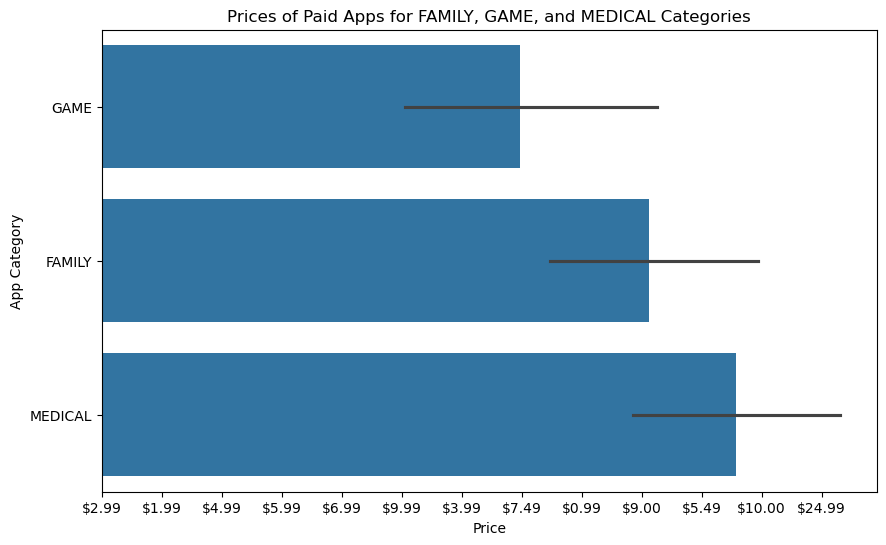

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
paid_apps_filtered = paid_apps[paid_apps['Category'].isin(['FAMILY', 'GAME', 'MEDICAL'])]
plt.figure(figsize=(10, 6))
sns.barplot(x='Price', y='Category', data=paid_apps_filtered, orient='h')
plt.title('Prices of Paid Apps for FAMILY, GAME, and MEDICAL Categories')
plt.xlabel('Price')
plt.ylabel('App Category')
plt.show()

## 7. Numbero di installazioni per le app a pagamento nelle categorie FAMILY, GAME e MEDICAL.

Dal grafico si intuisce come, anche con prezzi più alti, le app nella categoria MEDICAL non hanno un numero significativo di download e di utenti attivi. Questo potrebbe portare a non genererà molti ricavi.

Inoltre, le app mediche spesso hanno requisiti e normative specifici, che possono influire sui costi di sviluppo e sull'utilizzo da parte degli utenti. 

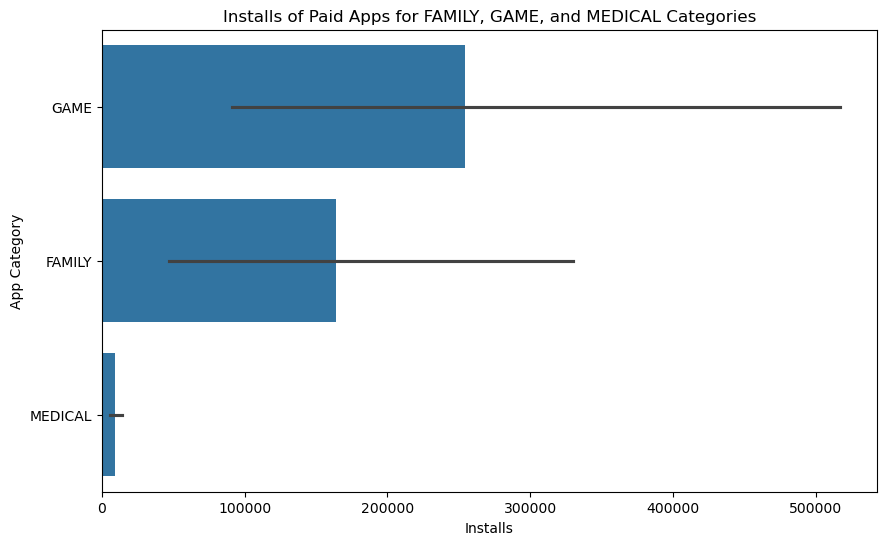

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
paid_apps_filtered = dati[dati['Type'] == 'Paid']
paid_apps_filtered = paid_apps_filtered[paid_apps_filtered['Category'].isin(['FAMILY', 'GAME', 'MEDICAL'])]
paid_apps_filtered['Installs'] = paid_apps_filtered['Installs'].str.replace(',', '').str.replace('+', '')
paid_apps_filtered['Installs'] = pd.to_numeric(paid_apps_filtered['Installs'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Installs', y='Category', data=paid_apps_filtered, orient='h')
plt.title('Installs of Paid Apps for FAMILY, GAME, and MEDICAL Categories')
plt.xlabel('Installs')
plt.ylabel('App Category')
plt.show()

## DECISIONE FINALE

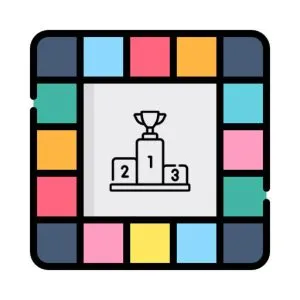

Dall'analisi è emerso che le app di gaming sono fra le più diffuse perchè offrono servizi di svago che gli utenti sono anche disposti a pagare. Tuttavia, considerato che Family è la catagoria più diffusa, potrebbe risultare un'idea vincente la progettazione di un'app di gioco concepita per le famiglie con un focus educativo, ad esempio un'app di giochi di quiz.

L'app a pagamento potrebbe includere esperienze di apprendimento interattive, giochi e strumenti progettati per sviluppare competenze specifiche per tutti i membri della famiglia.

Essendo a pagamento, l'app avrebbe diversi vantaggi rispetto ad un'app gratuita: 

* Contenuto curato: offrirebbe contenuti di alta qualità, attentamente selezionati, incentrati sul valore educativo, sulla sicurezza e sull'idoneità all'età.
* Meno pubblicità/distrazioni: offrirebbe un'esperienza più immersiva e priva di distrazioni senza pubblicità o pressioni per acquistare contenuti aggiuntivi. 
* Funzionalità premium: potrebbe offrire funzionalità aggiuntive come controlli parentali, monitoraggio dei progressi, percorsi di apprendimento personalizzati e accesso a contenuti extra.
* Accesso offline: offrirebbe accesso anche offline per poterne usufruire anche durante i viaggi o in situazioni con accesso ad Internet limitato.
* Supporto della community: potrebbe avere una community dedicata o un team di sviluppo che fornisce aggiornamenti regolari, correzioni di bug e supporto.

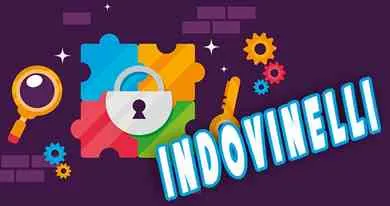